### Time-Domain Audio Features

---

#### <span style="color:#007acc">Amplitude Envelope (AE)</span>

- <b>Definition:</b> A smooth curve representing the outer contour of amplitude variations over time.
- <b>Computation:</b> Take the max absolute amplitude for each frame.
- <b>Use Case:</b> Captures the dynamics of loudness (e.g., attack and decay in instruments).
- <b>Formula:</b>
  <pre>
  AE[n] = max(|x[n:n+frame_length]|)
  </pre>
- <b>Applications:</b> Useful in ADSR envelope detection and dynamics analysis in speech/music.

---

#### <span style="color:#007acc">Root-Mean-Square Energy (RMS)</span>

- <b>Definition:</b> Measures the signal's energy by averaging the squared amplitudes, then taking the square root.
- <b>Computation:</b> 
  <pre>
  RMS[n] = sqrt( (1/N) * Σ x[i]^2 ) for each frame
  </pre>
- <b>Use Case:</b> Better approximation of perceived loudness than amplitude envelope.
- <b>Applications:</b> Voice activity detection, music genre classification, emotion recognition.

---

#### <span style="color:#007acc">Zero-Crossing Rate (ZCR)</span>

- <b>Definition:</b> The rate at which the audio signal crosses the zero amplitude axis.
- <b>Computation:</b> 
  <pre>
  ZCR[n] = (1/N-1) * Σ 𝟙[sign(x[i]) ≠ sign(x[i+1])]
  </pre>
- <b>Use Case:</b> Distinguishes between voiced (low ZCR) and unvoiced (high ZCR) segments.
- <b>Applications:</b> Speech segmentation, noise detection, percussive instrument analysis.

---

### Visualizing Time-Domain Features (Python Example)

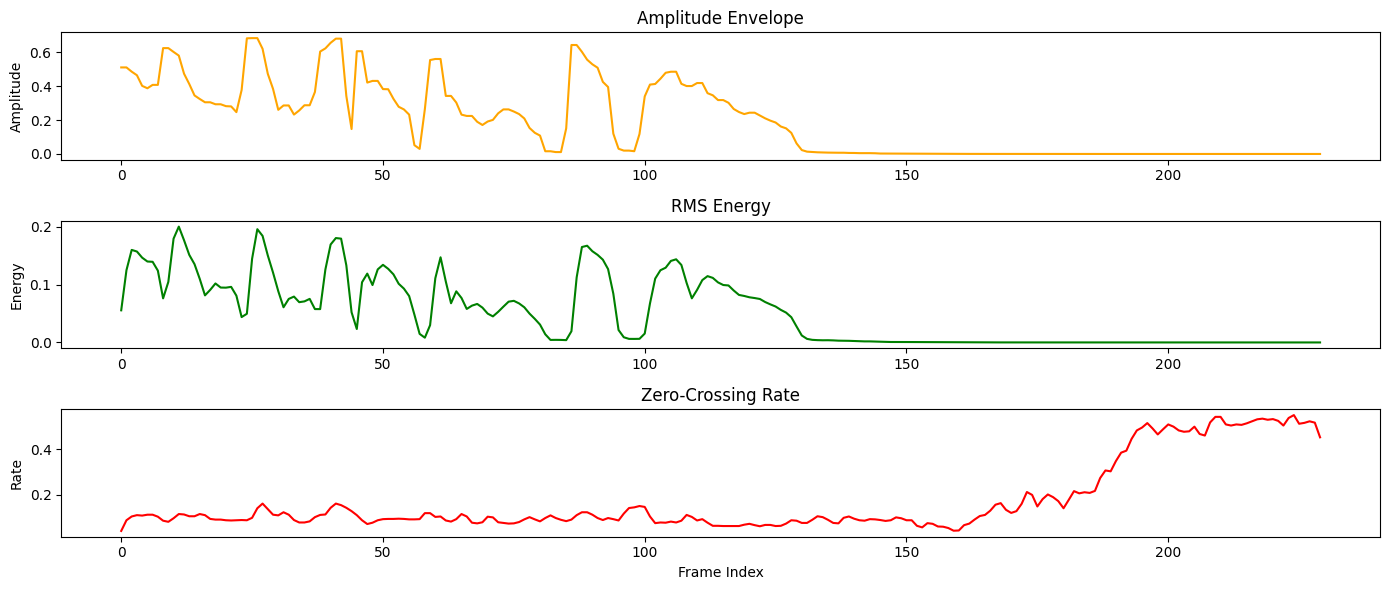

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(librosa.ex('trumpet'))
frame_length = 1024
hop_length = 512

# Compute features
ae = np.array([max(np.abs(y[i:i+frame_length])) for i in range(0, len(y), hop_length)])
rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)[0]

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(ae, color='orange')
plt.title('Amplitude Envelope')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(rms, color='green')
plt.title('RMS Energy')
plt.ylabel('Energy')

plt.subplot(3, 1, 3)
plt.plot(zcr, color='red')
plt.title('Zero-Crossing Rate')
plt.ylabel('Rate')
plt.xlabel('Frame Index')
plt.tight_layout()
plt.show()

<div style="font-family: sans-serif; line-height: 1.6;">

<h3 style="color:#007acc;">Time-Domain Audio Feature Summary</h3>

<h4 style="color:#007acc;">Amplitude Envelope</h4>

<ul>
  <li>Shows the peak amplitude within each analysis frame.</li>
  <li>The envelope rises and falls with speech activity, making it useful for detecting when sound events occur.</li>
  <li>Flat or near-zero segments represent silence or very low-level background noise.</li>
  <li>Sudden peaks often correspond to transients or high-energy vocal events.</li>
</ul>

<h4 style="color:#007acc;">RMS Energy</h4>

<ul>
  <li>Measures the average energy within a frame using the root-mean-square method.</li>
  <li>Provides a smoother and more perceptually accurate measure of loudness than the amplitude envelope.</li>
  <li>The curve follows the amplitude envelope but appears smoother and less spiky.</li>
  <li>Decreasing values toward the end suggest a fading signal or the end of speech.</li>
</ul>

<h4 style="color:#007acc;">Zero-Crossing Rate</h4>

<ul>
  <li>Counts how often the audio signal crosses the zero amplitude axis.</li>
  <li>Low ZCR indicates voiced or harmonic content, such as vowels.</li>
  <li>High ZCR suggests unvoiced speech components or noise, such as consonants or background hiss.</li>
  <li>A clear rise in ZCR in later frames suggests an increase in noise or unvoiced sounds.</li>
</ul>

<h4 style="color:#007acc;">Combined Insights</h4>

<ul>
  <li>Amplitude envelope and RMS energy provide amplitude-based cues.</li>
  <li>Zero-crossing rate offers information about the spectral content and signal complexity.</li>
  <li>These three features together are commonly used in voice activity detection, speech segmentation, and audio classification tasks.</li>
</ul>

</div>

<hr>


### Time Alignment for AE 

<b>AE, RMS Energy, Zero-Crossing Rate</b> are dependent on hop and frame size which is not time aligned. In order to get approximated time alignment use: 

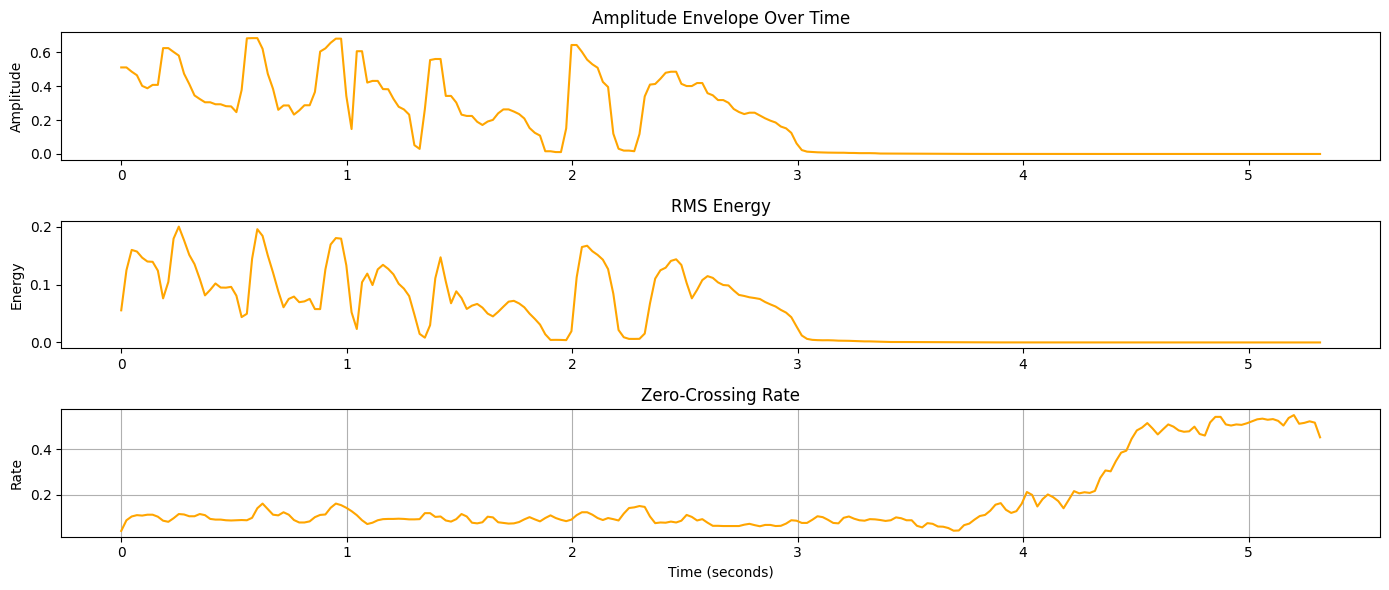

In [26]:
times = librosa.frames_to_time(np.arange(len(ae)), sr=sr, hop_length=hop_length)

plt.figure(figsize=(14, 6))

plt.subplot(3, 1, 1)
plt.plot(times, ae, color='orange')
plt.title("Amplitude Envelope Over Time")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(times, rms, color='orange')
plt.title('RMS Energy')
plt.ylabel('Energy')

plt.subplot(3, 1, 3)
plt.plot(times, zcr, color='orange')
plt.title('Zero-Crossing Rate')
plt.ylabel('Rate')

plt.xlabel("Time (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Amplitude envelope
<hr>
<h3>Formula Breakdown</h3>

$
AE_t = \max_{k = t \cdot K}^{(t+1)\cdot K - 1} s(k)
$

<h3><code>AE_t</code> — Amplitude Envelope at Frame <code>t</code></h3>
<ul>
  <li>This is the final output: the <strong>maximum amplitude value</strong> in frame <code>t</code>.</li>
  <li>It gives one number per frame.</li>
</ul>

<h3><code>[/k = t \cdot K\]</code> — Start of Frame <code>t</code></h3>
<ul>
  <li><code>k</code> is the sample index.</li>
  <li><code>K</code> is the <strong>frame length</strong> (number of samples per frame).</li>
  <li>This gives the <strong>index of the first sample</strong> in frame <code>t</code>.</li>
</ul>

<h3><code>[/(t+1) \cdot K - 1\]</code> — End of Frame <code>t</code></h3>
<ul>
  <li>This gives the <strong>index of the last sample</strong> in frame <code>t</code>.</li>
  <li>The range of samples in frame <code>t</code> is: 
  \[
  [t \cdot K, (t+1) \cdot K - 1]
  \]</li>
</ul>

<h3><code>s(k)</code> — Amplitude of the <code>k</code>-th sample</h3>
<ul>
  <li>This is the raw signal amplitude at sample <code>k</code>.</li>
</ul>

<h2>Interpretation</h2>

<blockquote>
For each frame <code>t</code>, take the samples from index <code>t · K</code> to <code>(t+1) · K - 1</code>, and find the <strong>maximum absolute amplitude</strong> in that range.  
That value becomes the <strong>amplitude envelope</strong> for that frame.
</blockquote>

<h2>Example</h2>

If:
<ul>
  <li><code>K = 1024</code> (frame size)</li>
  <li><code>t = 3</code> (4th frame)</li>
</ul>

Then:
<ul>
  <li>Sample range = [3072, 4095]</li>
  <li>
    \[
    AE_3 = \max \left( s(3072), s(3073), ..., s(4095) \right)
    \]
  </li>
</ul>


<hr>

## Root-mean-square energy

<img src="../images/rms.png">

<hr>

## Zero Corssing Rate

<img src="../images/zero_crossing_rate.png">
<hr>
<img src="../images/zero_crossing_rate_2.png">
<hr>
<img src="../images/zero_crossing_rate_3.png">
<hr>
<img src="../images/zero_crossing_rate_4.png">